# Data exploration script
Note: Do not run this notebook without the train.csv file being in the same folder. We could not upload it due to the large size of the file.

In [4]:
# Import necessary libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from explore_functions import *
from scipy import stats
from proj1_helpers import *
from os import path

In [5]:
# Useful starting lines
%matplotlib inline
%load_ext autoreload
%autoreload 2
plt.rcParams["figure.figsize"] =(24,18)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [21]:
# Import raw training data
yb, input_data, ids = load_csv_data('train.csv', sub_sample=False)
labels=pd.read_csv('train.csv', nrows=1).columns.tolist()


In [7]:
# Create data frames to used with pandas library
x = input_data
y = yb
y[y == -1.] = 0

In [8]:
# Replace -999 by NaN
x_nan = x
x_nan[x == -999] = np.nan

x_o = x_nan[y == 1.,:]
x_z = x_nan[y == 0,:]

# print(x_o)
# print(x_z)

# Calculate fraction of NaNs
num_nas_o = []
nas_frac_o = []
num_nas_z = []
nas_frac_z = []

for c in range(0, 30):
    num_nas_o.append(np.count_nonzero(np.isnan(x_o[:, c])))
    nas_frac_o.append(np.divide((num_nas_o[c]), x_o.shape[0]))
    num_nas_z.append(np.count_nonzero(np.isnan(x_z[:, c])))
    nas_frac_z.append(np.divide((num_nas_z[c]), x_z.shape[0]))
    
# print(nas_frac_o)
# print(nas_frac_z)

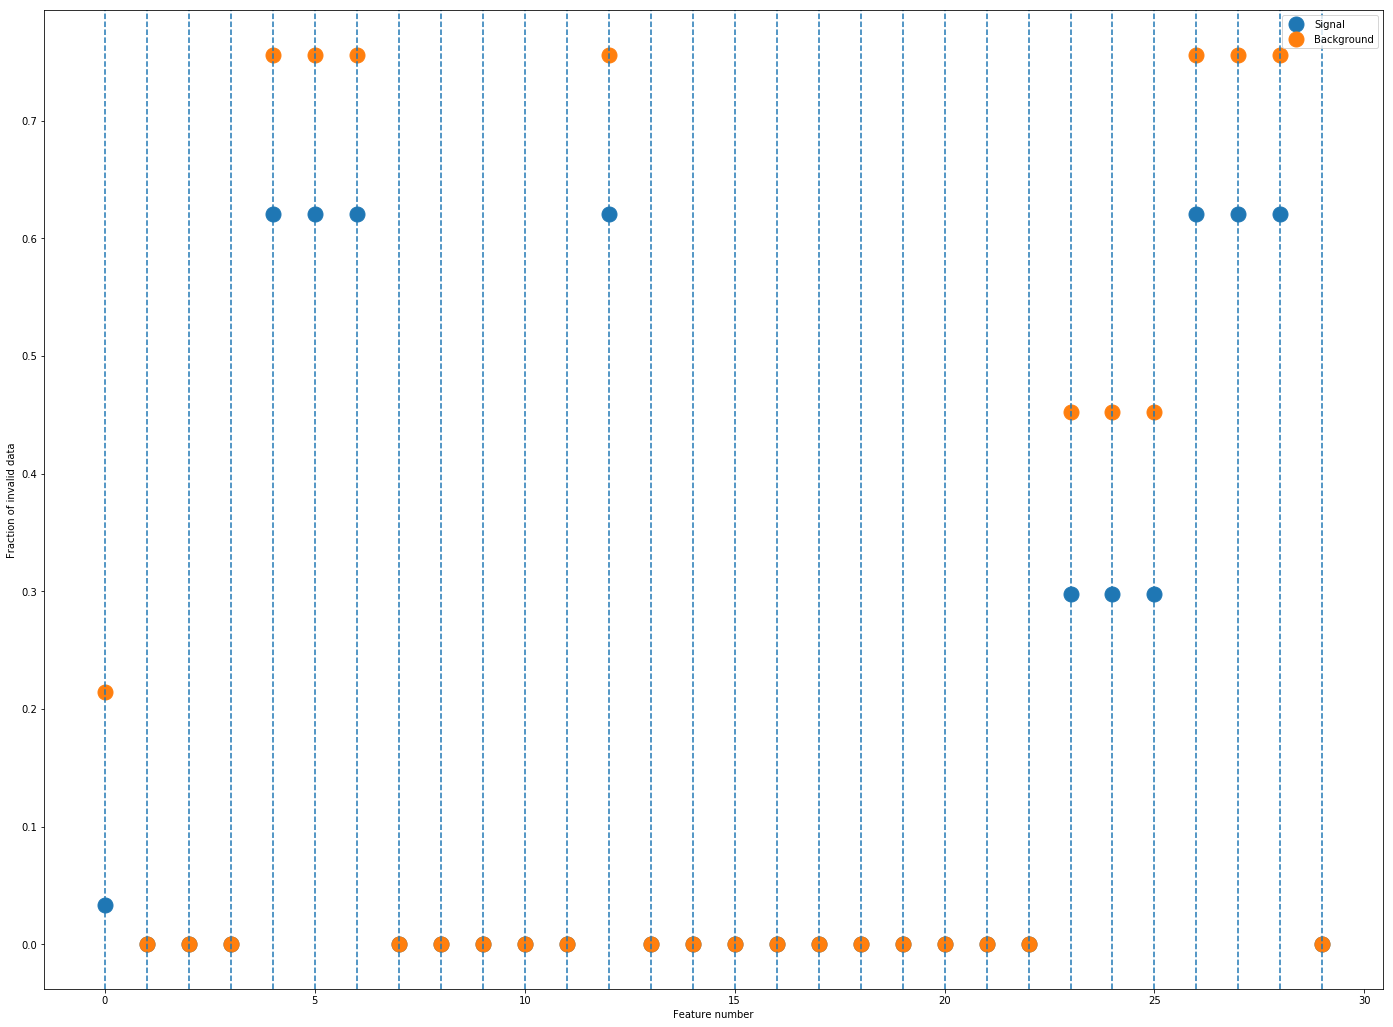

In [9]:
# Visualize proportion of missing data
fig=plt.figure(figsize=(24,18))
plt.plot(np.arange(30), nas_frac_o, '.', markersize=30)
plt.plot(np.arange(30), nas_frac_z, '.', markersize=30)
plt.legend(['Signal','Background'])
for i in range(30):
    plt.axvline(i, linestyle='--')
plt.xlabel('Feature number')
plt.ylabel('Fraction of invalid data')
plt.savefig('Missing_data_frac.png')

In [10]:
# We looked at different ways of dealing with this missing data. We looked at whether it made any difference to replace 
# missing values with the mean specific to each class or the mean of all feature values, irrespective of the class. We 
# first plotted the distributions of the data
# We first separated the data into classes, calculated the mean for each class, and plotted the distributions for each class:
# Replace missing data with the mean from each class
x_clean, x_ones, x_zeros = replace_nans(x_nan, y)

In [11]:
# Normalize data
x_ones = norm_x(x_clean[y == 1.])
x_zeros = norm_x(x_clean[y == 0])

[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.5523400888967497, 0.02333782621752064, 5.943865843111403e-228, 0.3692907906363707, 0.03896203808699638, 0.0, 0.00014242824685300378, 0.0, 0.0, 0.0, 0.8914600159871032, 0.8945815174941751, 0.0, 0.3506373460235441, 3.4638405387439655e-07, 0.0]


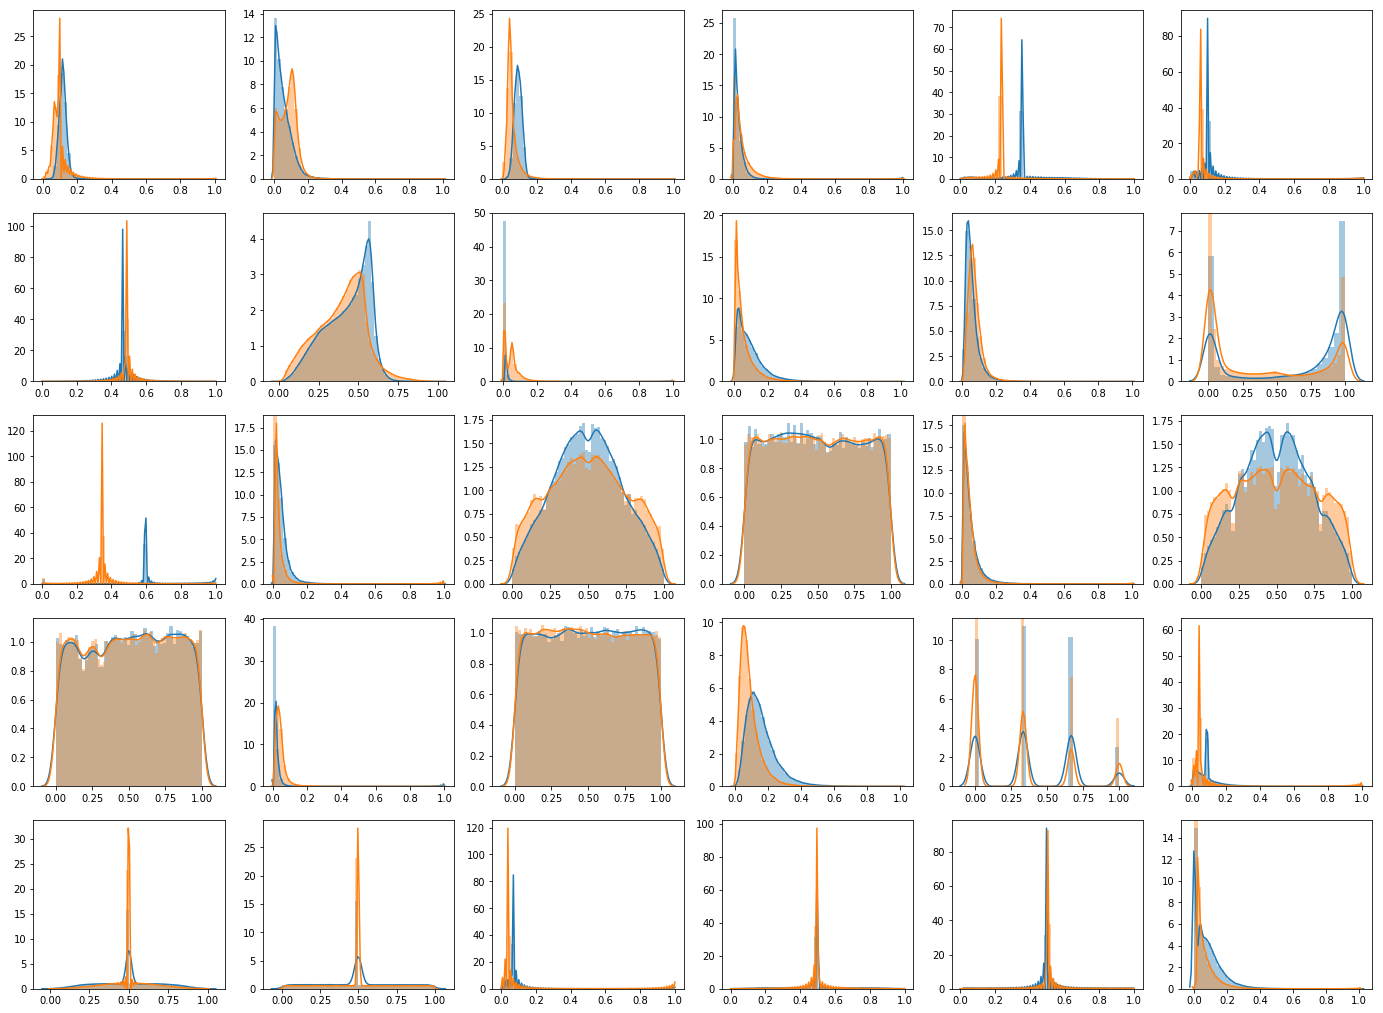

In [12]:
# Compare data distributions between classes, when replacing missing data
# with mean of each class

fig=plt.figure()
p_values = []
for i in range(1,31):
    t_test = stats.ttest_ind(x_ones[:, i-1], x_zeros[:, i-1], equal_var=False)
    p_values.append(t_test.pvalue)
    plt.subplot(5, 6, i)
    sns.distplot(x_ones[:,i-1], norm_hist=True)
    sns.distplot(x_zeros[:,i-1], norm_hist=True)

print(p_values)
plt.savefig('Compare distributions raw data (class mean).png')

In [13]:
# Then we looked at the distributions when replacing missing values with the means of all values
x_clean_means, x_means = replace_nans_gen_mean(x_nan)

In [14]:
# Normalize data
x_ones_means = norm_x(x_clean_means[y == 1.])
x_zeros_means = norm_x(x_clean_means[y == 0])

[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.5523400888967497, 0.02333782621752064, 5.943865843111403e-228, 0.3692907906363707, 0.03896203808699638, 0.0, 0.00014242824685300378, 0.0, 0.0, 0.0, 0.8914600159871032, 0.8945815174941751, 0.0, 0.3506373460235441, 3.4638405387439655e-07, 0.0]


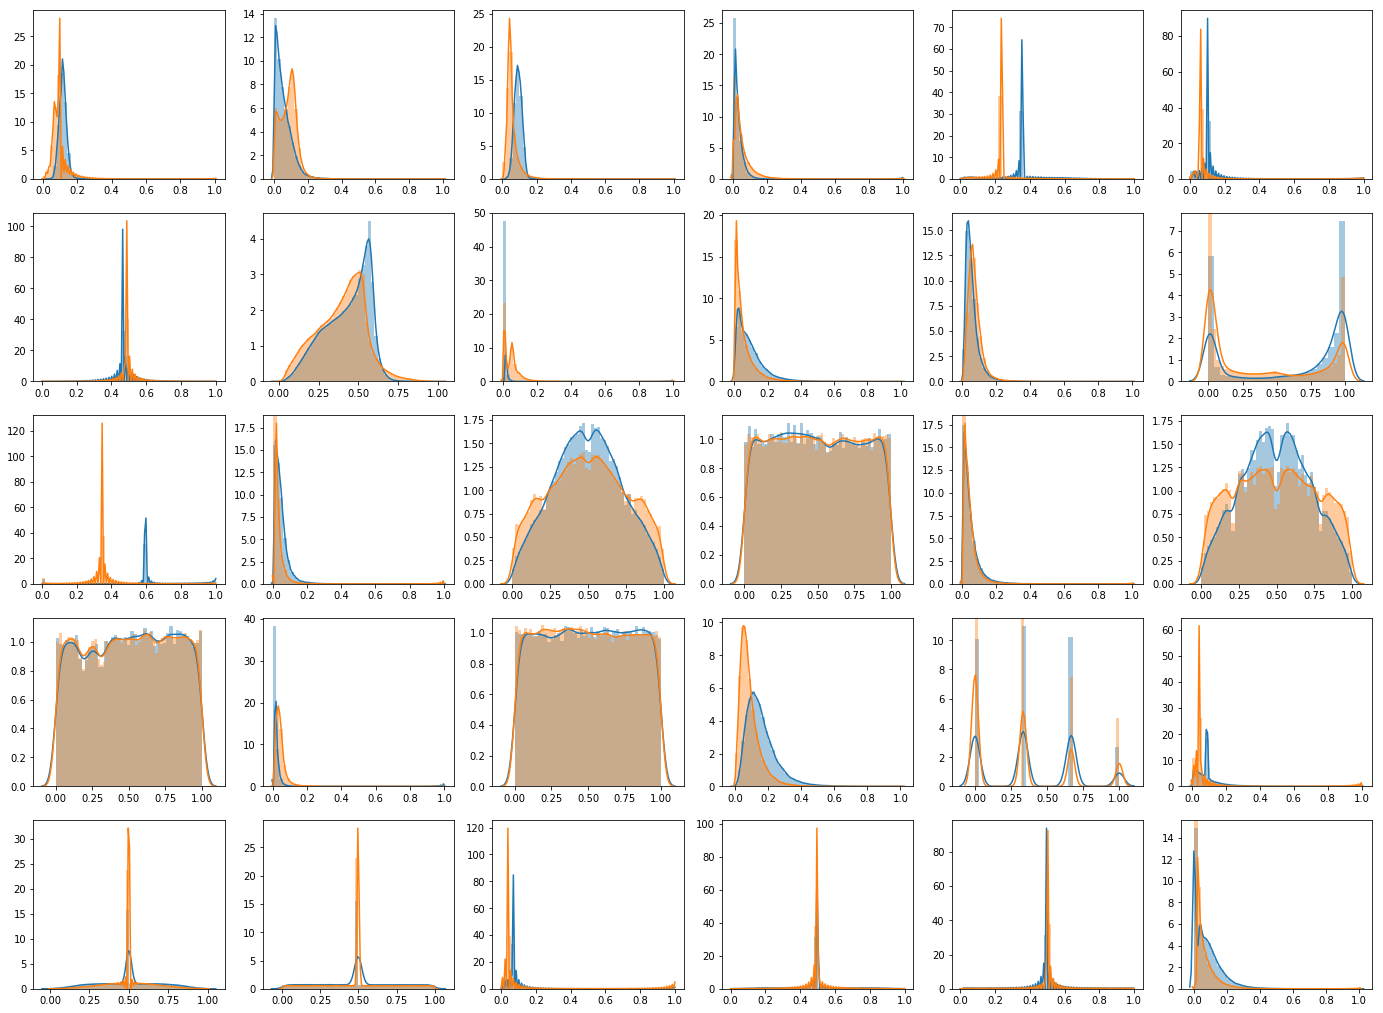

In [15]:
# Compare data distributions between classes, when replacing missing data
# with mean of all samples

fig=plt.figure()
p_values = []
for i in range(1,31):
    t_test = stats.ttest_ind(x_ones_means[:, i-1], x_zeros_means[:, i-1], equal_var=False)
    p_values.append(t_test.pvalue)
    plt.subplot(5, 6, i)
    sns.distplot(x_ones_means[:,i-1], norm_hist=True)
    sns.distplot(x_zeros_means[:,i-1], norm_hist=True)

print(p_values)
plt.savefig('Compare distributions raw data (general mean).png')

In [16]:
# As distributions did not look different, and as we would not know the classes for the testing set to calculate separate
# means, we used the mean of all samples to fill in missing values
x_gen_mean, _ = replace_nans_gen_mean(x_nan)

In [17]:
# Transform data whenever skewed. Apply cubed transformation when moderately skewed to the left (< -0.5), 
# and log transformation when moderately skewed to the right (> 0.5)
# https://medium.com/@TheDataGyan/day-8-data-transformation-skewness-normalization-and-much-more-4c144d370e55
x_transformed = transform_to_gauss(x_gen_mean)

[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 9.010874329312873e-11, 6.331073652621995e-18, 0.0, 0.0, 0.0, 0.0, 0.0, 0.6227867087586955, 0.027640941277211298, 2.9339524061949593e-100, 0.42433045408706427, 0.03896203808699076, 2.628849983747935e-156, 0.00018533065662558617, 0.0, 0.0, 0.0, 0.8617407679624872, 0.894581517494081, 2.689467683899313e-248, 0.3506373460235481, 1.891963860610803e-07, 0.0]


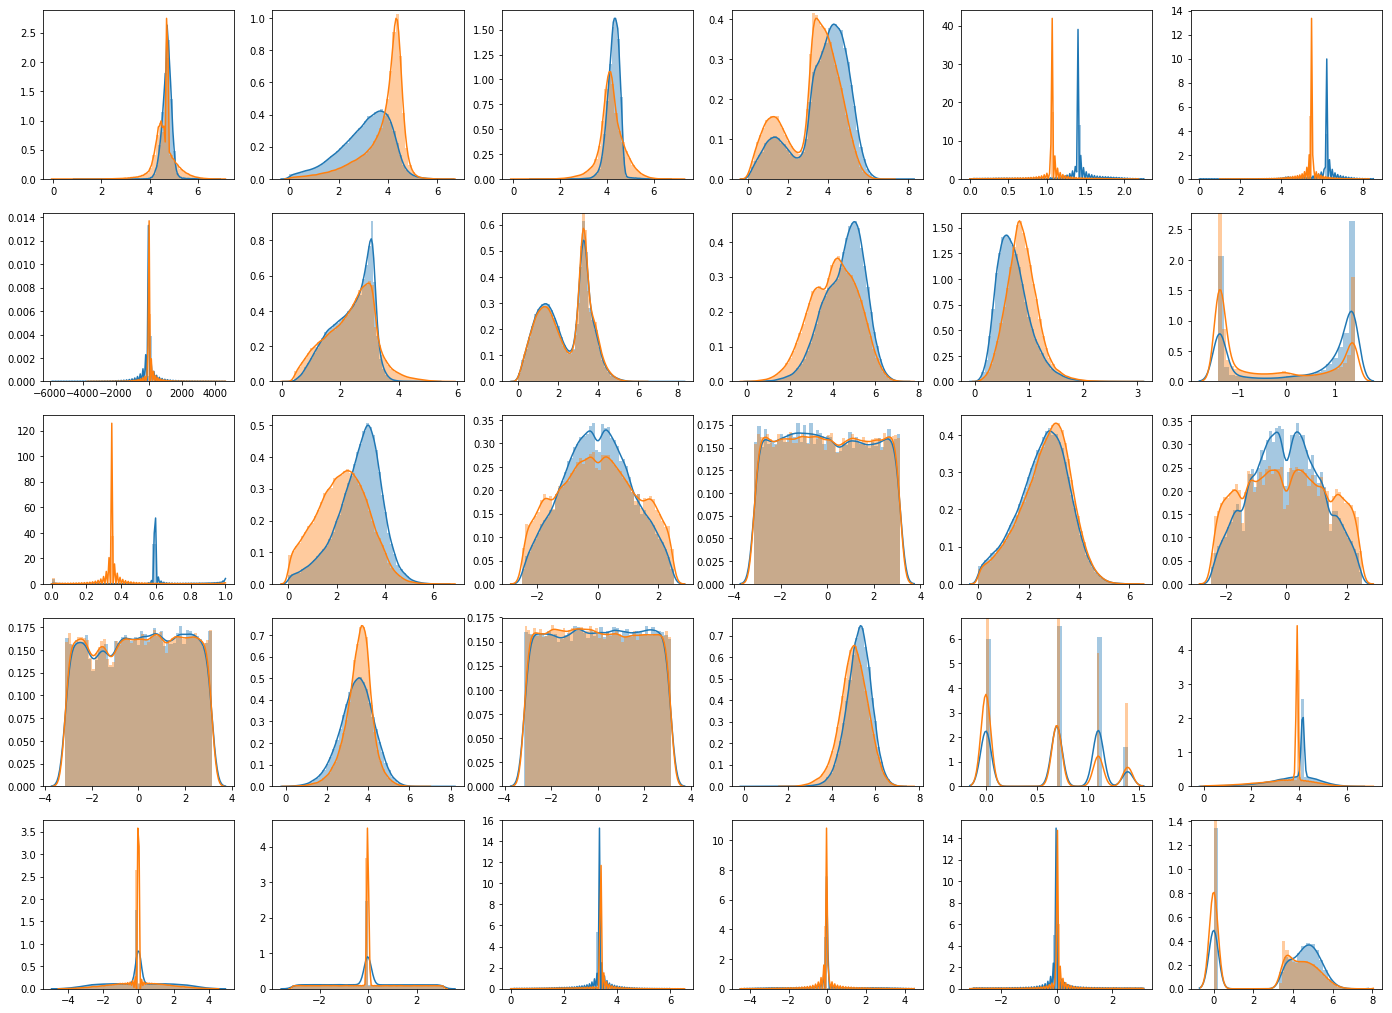

In [18]:
# Compare data distributions between classes after transformation

fig=plt.figure()
p_values = []

x_tr_ones = x_transformed[y == 1.]
x_tr_zeros = x_transformed[y == 0]

for i in range(1,31):
    t_test = stats.ttest_ind(x_tr_ones[:, i-1], x_tr_zeros[:, i-1], equal_var=False)
    p_values.append(t_test.pvalue)
    plt.subplot(5, 6, i)
    sns.distplot(x_tr_ones[:,i-1], norm_hist=True)
    sns.distplot(x_tr_zeros[:,i-1], norm_hist=True)

print(p_values)
plt.savefig('Compare distributions transformed data.png')

In [19]:
# Standardize data
x_preprocessed = zscore_std(x_transformed)

In [22]:
# Create dataframe to visualize with pandas
df_x = pd.DataFrame(x_preprocessed, columns=labels[2:])
df_y = pd.DataFrame({'outcome':y})
data = [df_y, df_x]
df = pd.concat(data, axis=1)
# Take a sample of the data to reduce plotting times
df_sample = df.sample(1000) 

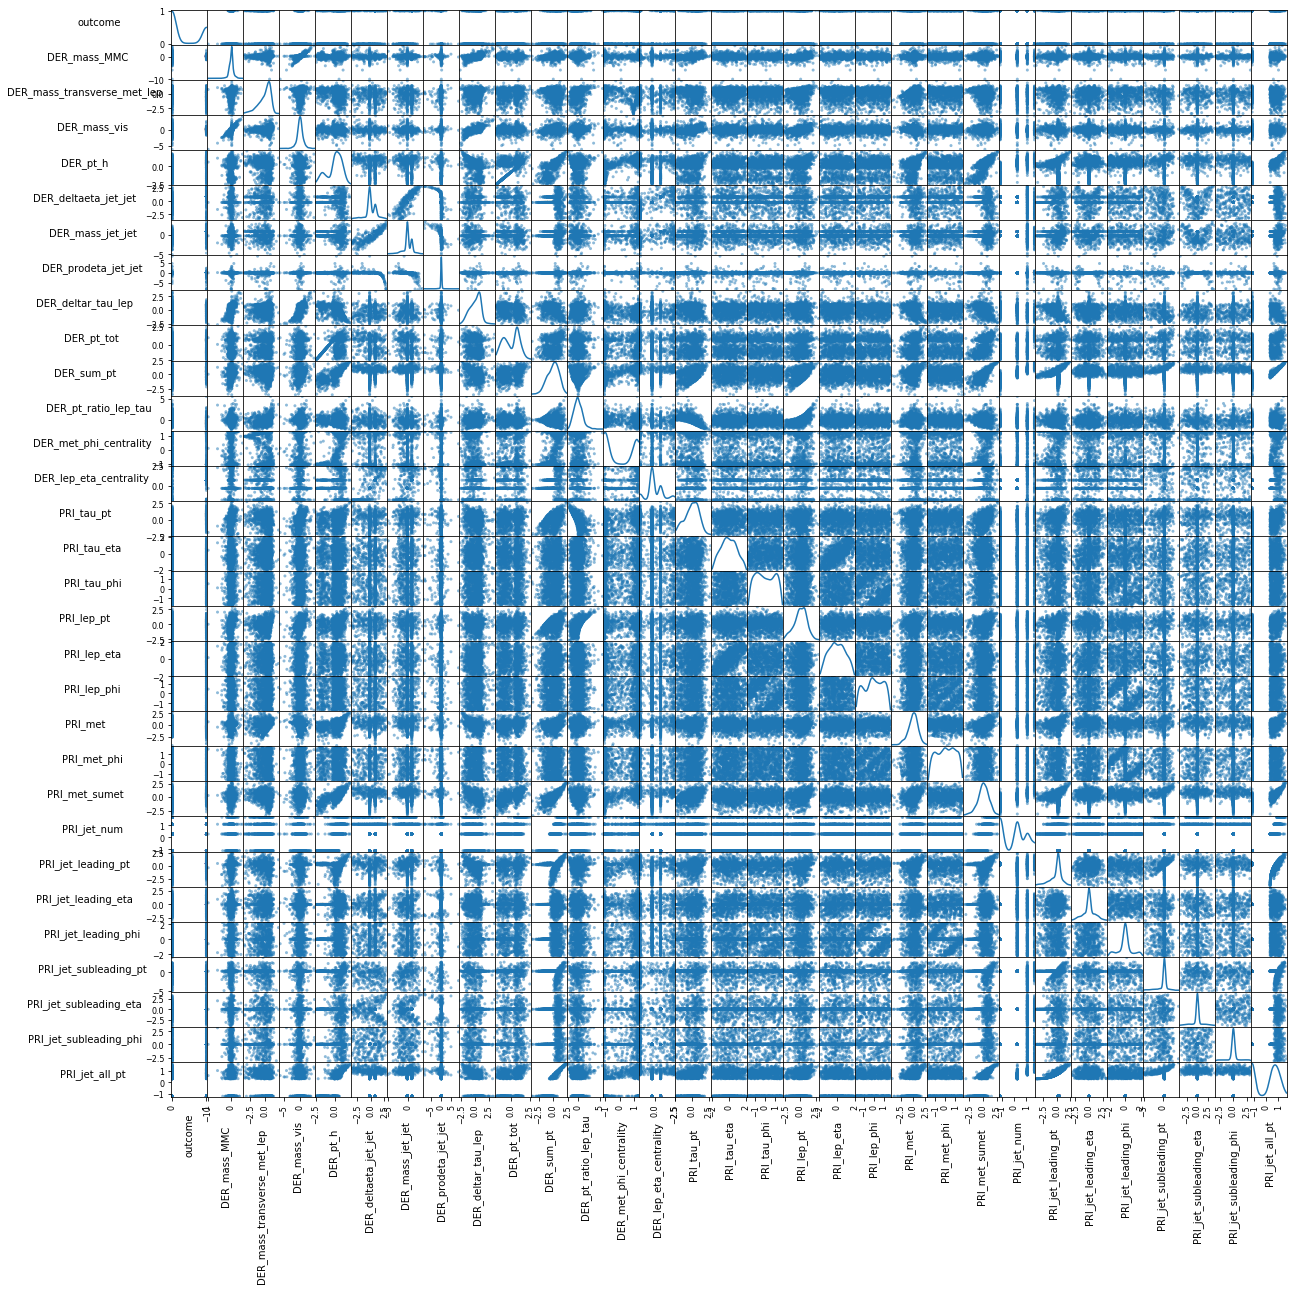

In [23]:
# We used a scatter matrix to look at the distribution of the features and their interactions
#Scatter matrix
plot_scatter_matrix(df_sample)

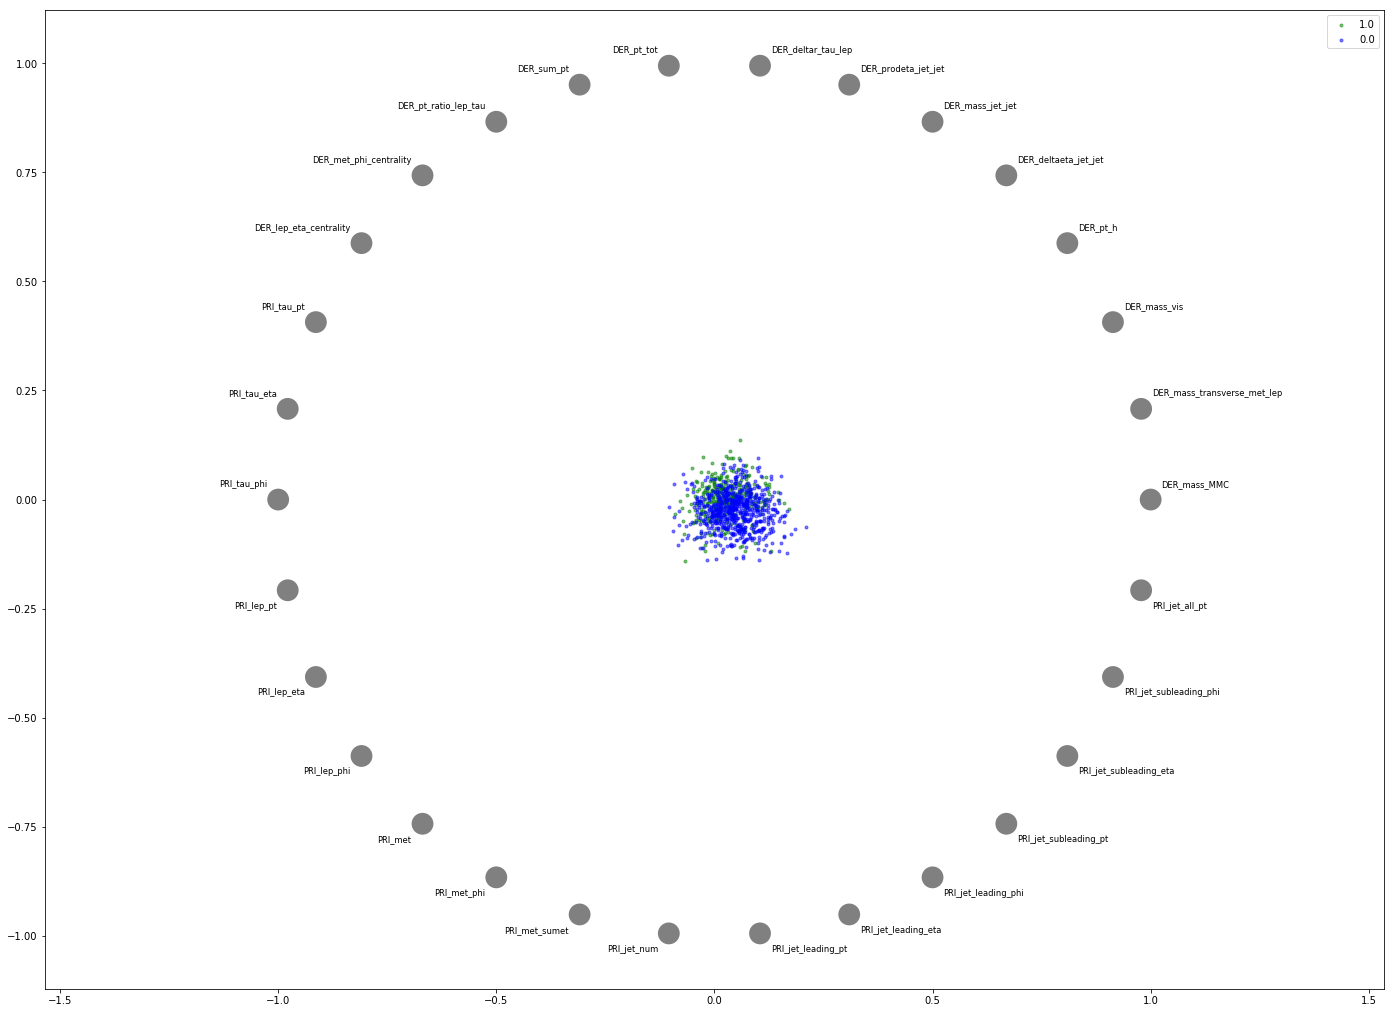

In [24]:
# Then, we tried to look whether there was any easily discernible separation between classes using radial visualization
#RadViz (cleaned data)
plot_radviz(df_sample, 'outcome')

In [25]:
input_st=zscore_std(input_data)

In [26]:
#Create a dataframe to use pandas library plotting tools. Because plotting is slow, we take only a subset of the whole points
dfx=pd.DataFrame(data=input_st, columns=labels[2:])
out=np.array([None]*len(y))
#Give string labels to signal and background for clarity
out[y==-1]='background'
out[y==1]='signal'
dfy=pd.DataFrame({'Prediction':out})
#Combine x and y dataframes
data=[dfy,dfx]
df=pd.concat(data, axis=1)
#Some plots like the scatter matrix take a long time to run if too many points are used so we use a random sample
sampled_data_large=df.sample(10000)
sampled_data_small=df.sample(500)

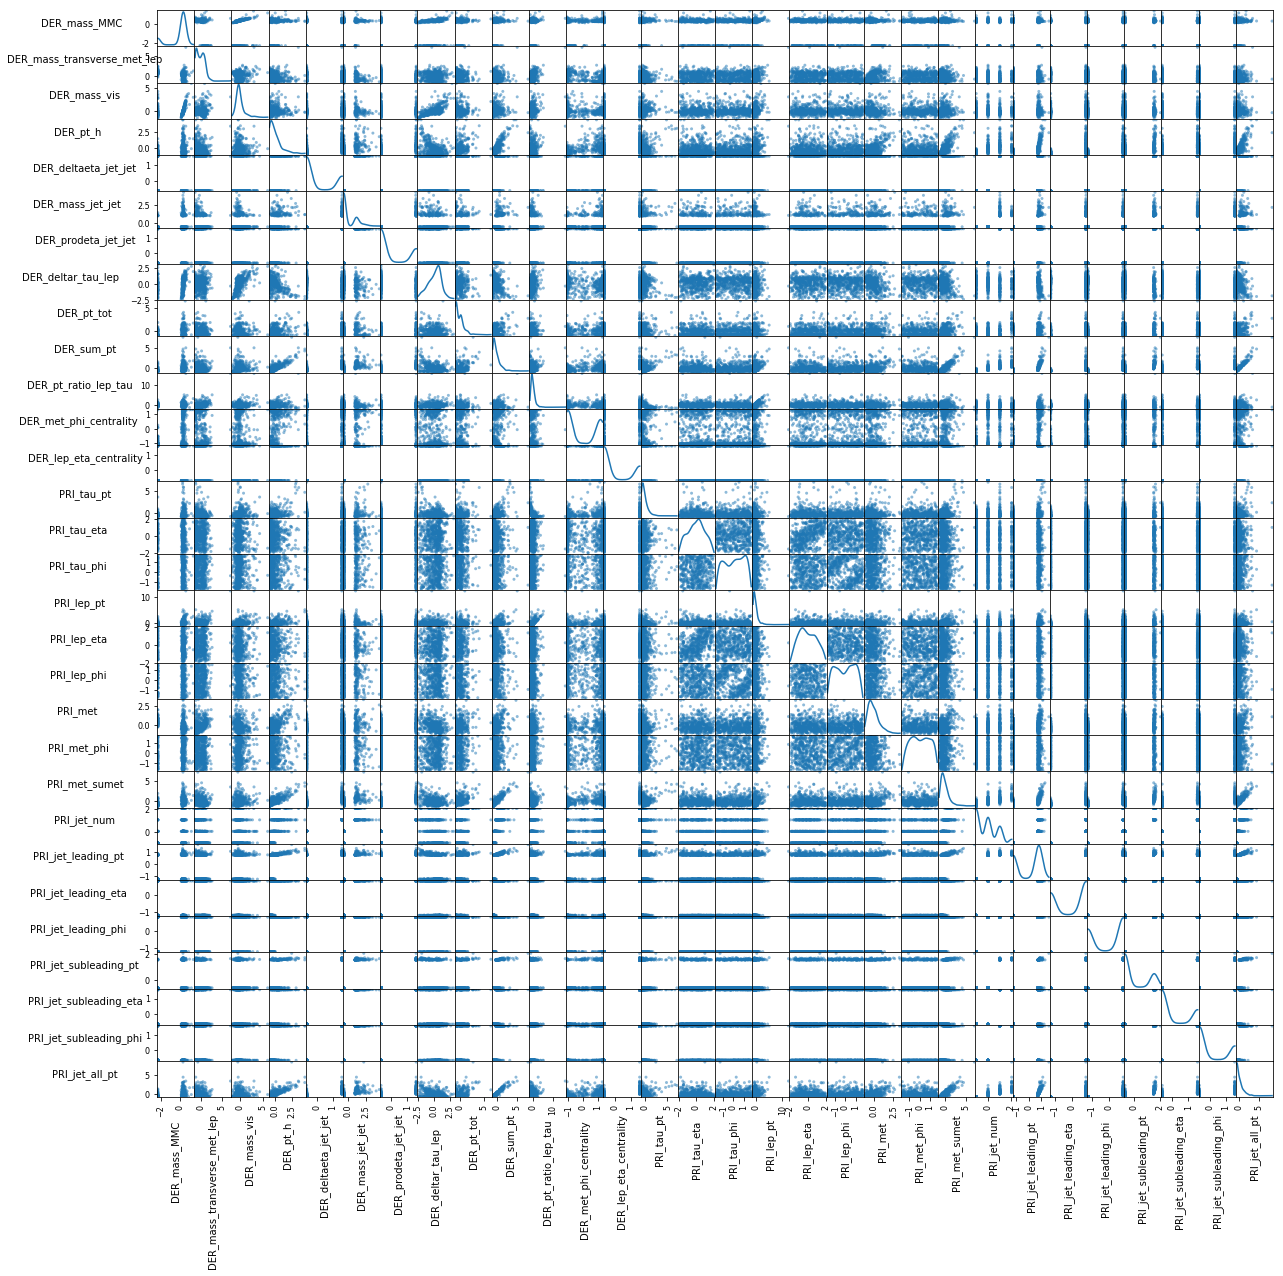

In [27]:
#Scatter matric plot shows correlations between some of the features. 
#We tested removing one feature in each pair of highly linearly correlated features but this did not increase the test scores.
plot_scatter_matrix(sampled_data_small)

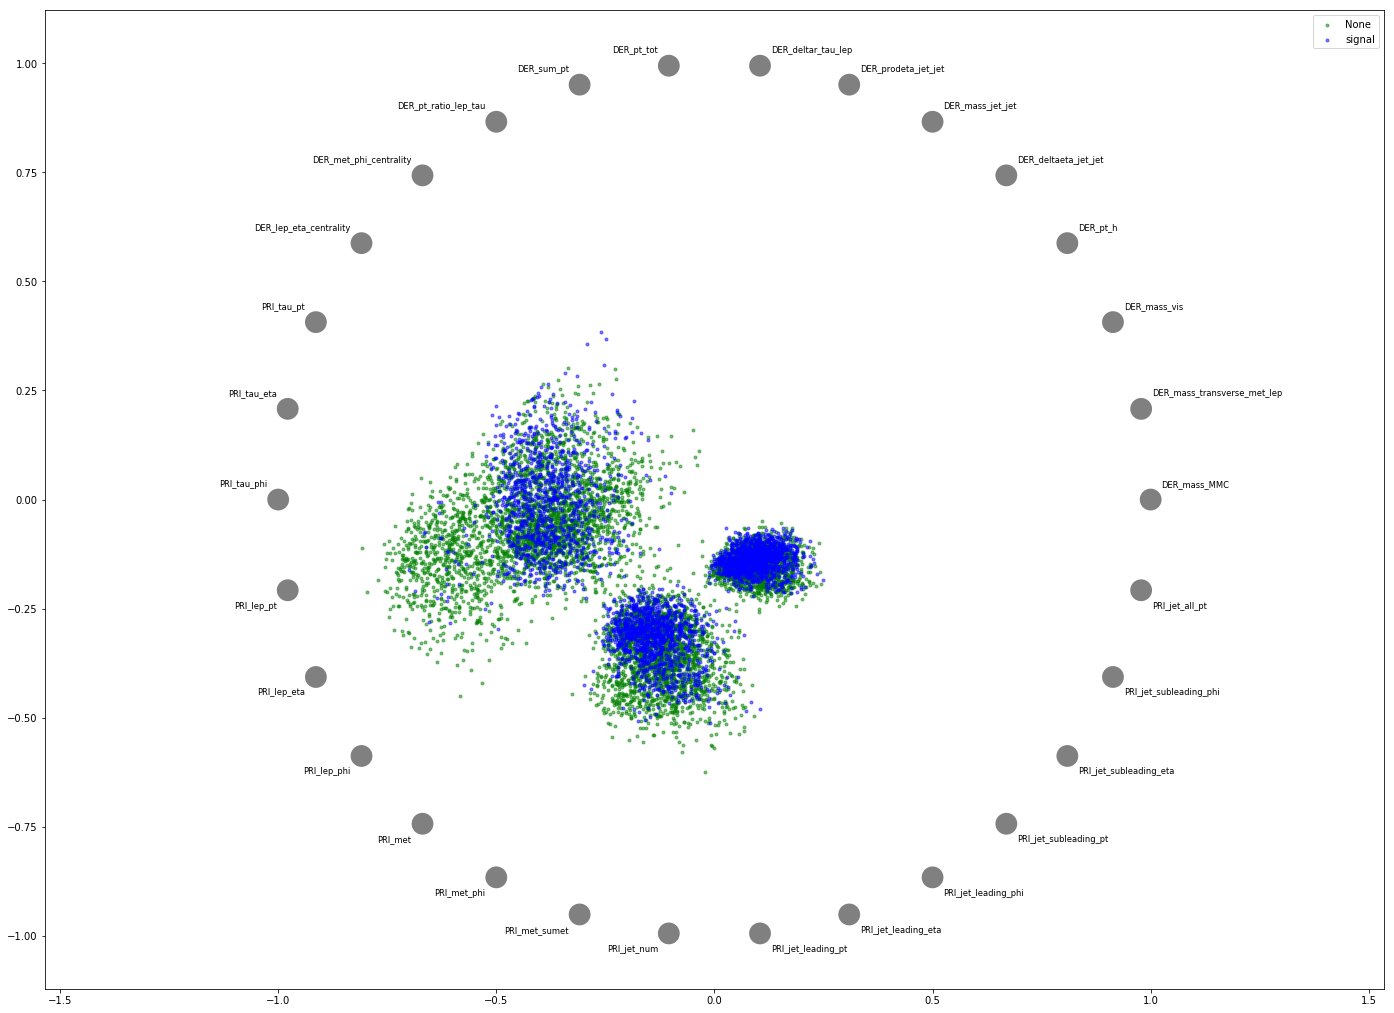

In [28]:
#Radviz plot of all features and outcomes a RANDOM SUBSET of points, INCLUDING THE INVALID ONES. 
# High values of PRI_lep_pt, PRI_lep_eta, pri_jet_sumet, pri_jet_num and pri_jet_leading_pt seem correlated 
# with background signal.
plot_radviz(sampled_data_large, 'Prediction')

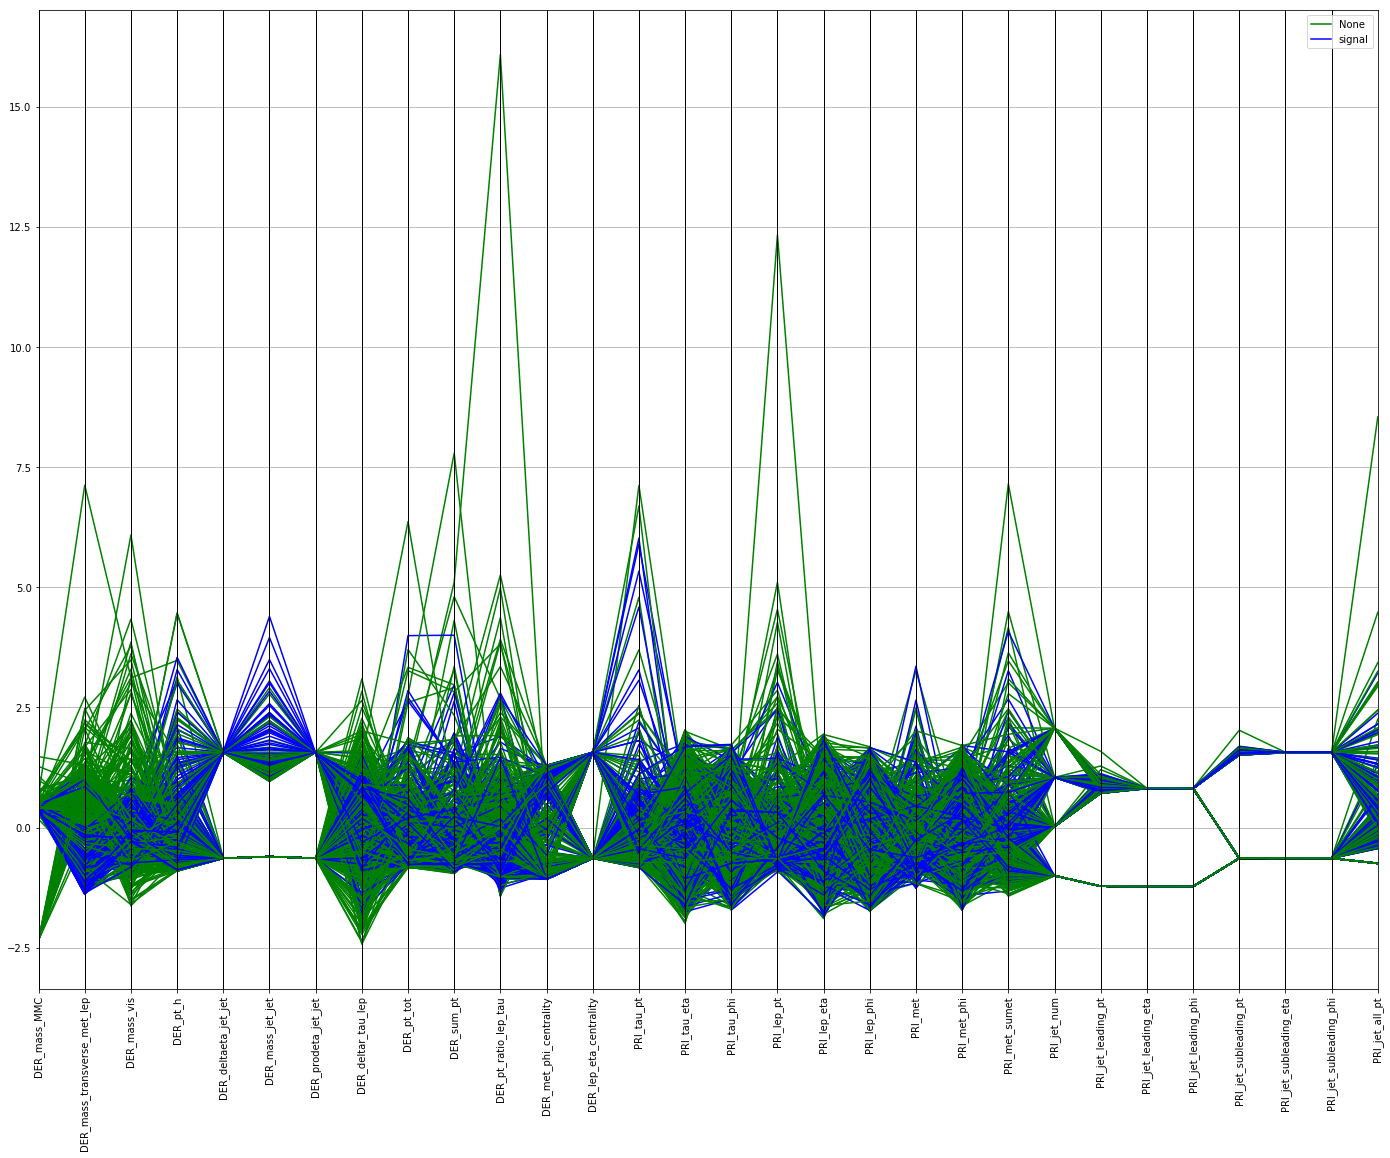

In [29]:
#The parallel coordinates plot does not give very clear information in this case as the feature space is very large.
#Many points are therefore required to see a global trend but the plot becomes hard to read as lines superimpose
plot_parallel_coord(sampled_data_small, 'Prediction')

In [30]:
# We tried to remove all points containing at least one invalid value to see if different trends emerge
X_cleaned=remove_invalid_data(np.column_stack((y,input_data)), -999)

In [31]:
#Create a dataframe to use pandas library plotting tools. Because plotting is slow, we take only a subset of the whole points
#X_cleaned,_,__=ml.standardise(X_cleaned)
df_cleaned=pd.DataFrame(data=X_cleaned, columns=labels[1:])
#Some plots like the scatter matrix take a long time to run if too many points are used so we use a random sample
sampled_cleaned_data_large=df_cleaned.sample(10000)
sampled_cleaned_data_small=df_cleaned.sample(500)

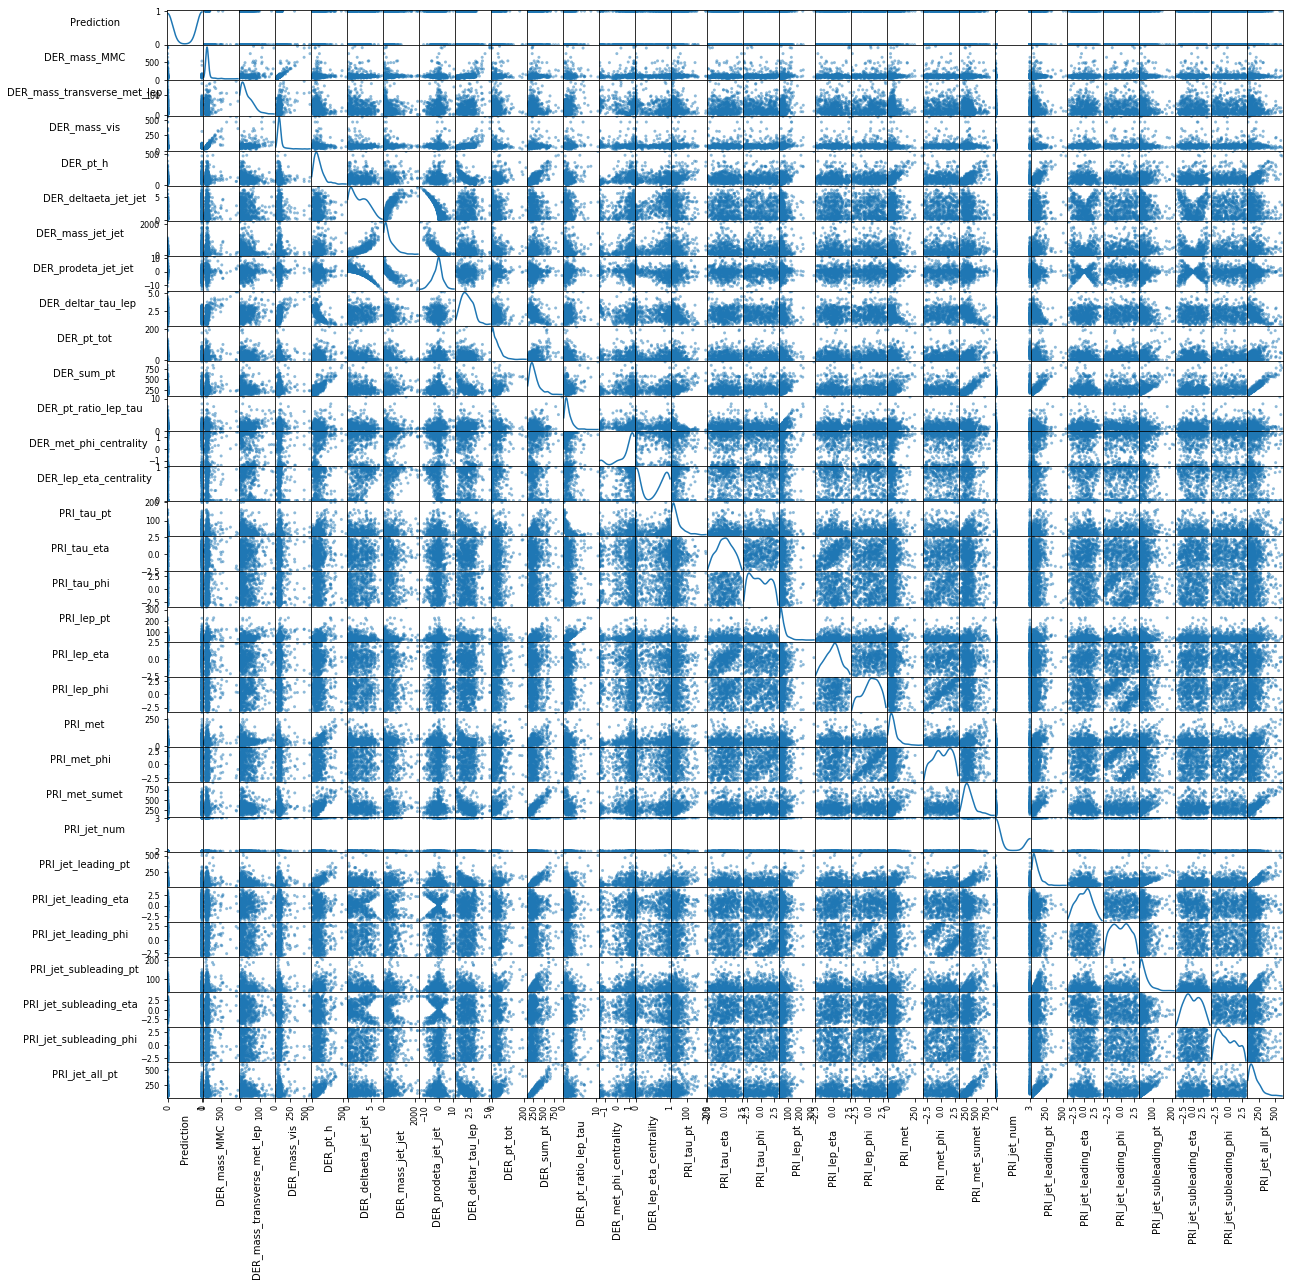

In [32]:
#Matrix plot for a subset of the filtered data
plot_scatter_matrix(sampled_cleaned_data_small)

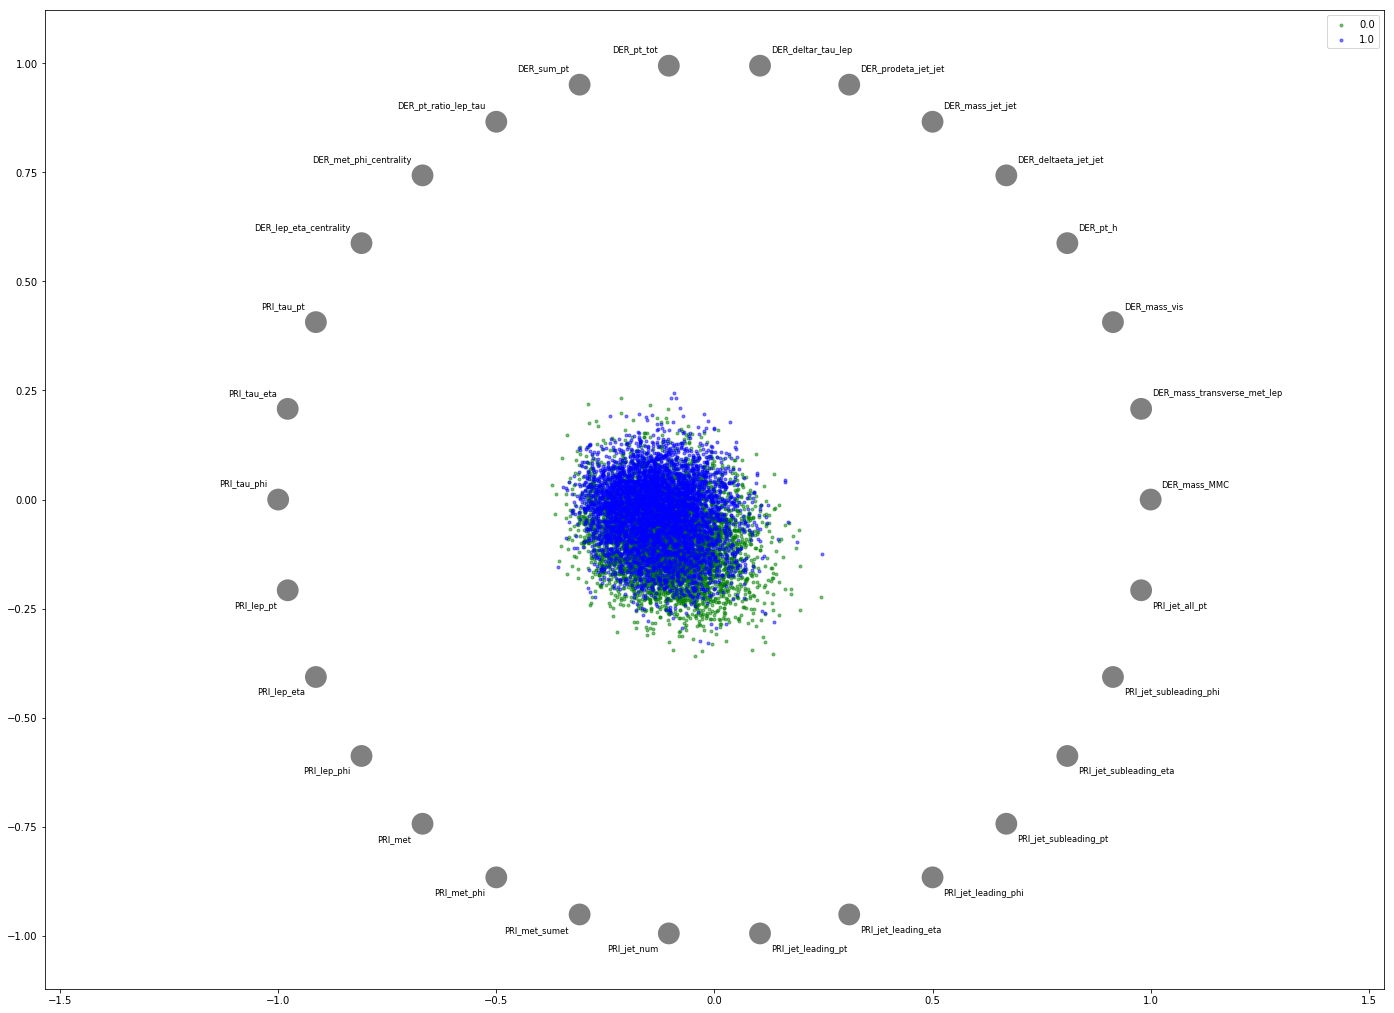

In [33]:
#Radviz plot for a subset of the filtered data
# The separation seen with the unfiltered data is now absent, meaning that the invalid values (-999) carry a correlation
plot_radviz(sampled_cleaned_data_large, 'Prediction')